In [1]:
data_path = '../../data/'

In [2]:
import random
import pickle

import pandas as pd
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
from jupyterthemes import jtplot

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from utils import TextProcessor

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
jtplot.style('gruvboxd')

In [4]:
que = pd.read_csv(data_path + 'questions.csv')
tag_que = pd.read_csv(data_path + 'tag_questions.csv')
tags = pd.read_csv(data_path + 'tags.csv')
pro = pd.read_csv(data_path + 'professionals.csv')
ans = pd.read_csv(data_path + 'answers.csv')

# Text processing

In [5]:
tp = TextProcessor()

In [6]:
features = ['questions_title', 'questions_body', 'answers_body', 
            'tags_tag_name', 'professionals_industry', 'professionals_headline']

In [7]:
for df, column in zip([que, que, ans, tags, pro, pro], features):
    df[column] = df[column].apply(tp.process, allow_stopwords=(column == 'tags_tag_name'))

# Data wrangling

In [8]:
que_tags = que.merge(tag_que, left_on = 'questions_id', right_on = 'tag_questions_question_id').merge(tags, left_on = 'tag_questions_tag_id', right_on = 'tags_tag_id')
que_tags = que_tags[['questions_id', 'tags_tag_name']].groupby(by = 'questions_id', as_index = False).sum()
que_tags = que.merge(que_tags, on = 'questions_id')
ans_que_tags = ans.merge(que_tags, left_on = "answers_question_id", right_on = "questions_id")
df = ans_que_tags.merge(pro, left_on = 'answers_author_id', right_on = 'professionals_id')

In [9]:
df

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,tags_tag_name,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,p hi p p ask interest question give two site g...,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,teacher career question,math teacher math teacher use colleg professor...,lecturcollegprofessor,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,assist recogn develop potenti,2015-10-19 20:56:49 UTC+0000
1,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,p hi rodrigo p p import thing rememb go pursu ...,0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,kind colleg could go soccer player,like soccer play sens year old soccer best spo...,collegbuildsoccer,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,assist recogn develop potenti,2015-10-19 20:56:49 UTC+0000
2,825f6e316a5f48328d6f8af831df9940,36ff3b3666df400f956f8335cf53e09e,0149c6d63e214040b44d4a3789bb00ba,2018-04-15 23:08:46 UTC+0000,p congratul interest find right career follow ...,0149c6d63e214040b44d4a3789bb00ba,34217a1861d640a58c85e033414cf9cb,2018-04-12 17:13:45 UTC+0000,best way prepar studi engin graduat school,interest comput neurosci hope studi either bio...,enginneuroscigradschool,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,assist recogn develop potenti,2015-10-19 20:56:49 UTC+0000
3,f3fc23809cda472780fc565334f35000,36ff3b3666df400f956f8335cf53e09e,acc611cfb5c44daa8a3d7d65dfffa5ff,2018-08-14 10:37:01 UTC+0000,p import thing get know well enough determin c...,acc611cfb5c44daa8a3d7d65dfffa5ff,5b751a8ee4a047f7a08ce9eb5e43e5a2,2018-08-14 04:49:33 UTC+0000,prepar job search go senior year colleg,sociolog polit scienc intern studi major love ...,job searchcareer choicjobcolleg job,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,assist recogn develop potenti,2015-10-19 20:56:49 UTC+0000
4,7410001e9a2f46df982cba38ba60486a,36ff3b3666df400f956f8335cf53e09e,b44409c0c83a43578f4f2d0a0e4d8ead,2016-12-08 02:26:05 UTC+0000,p hi alexandra p p site profession organ deal ...,b44409c0c83a43578f4f2d0a0e4d8ead,2fe767de78fa4dfd83f0021cf7712064,2016-12-07 20:43:41 UTC+0000,major recommend order ethnomusicologist,current enrol world music class univers find f...,musicethnomusicologmusicologworld musicworld c...,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,assist recogn develop potenti,2015-10-19 20:56:49 UTC+0000
5,8961104db49b42e6882661724543b565,36ff3b3666df400f956f8335cf53e09e,27653986401c4a8388d03cfa28acf5b4,2016-10-20 21:47:01 UTC+0000,p hi christoph p p ask good question luck mani...,27653986401c4a8388d03cfa28acf5b4,b5bd31ccef2d4a4fa638dd931a0e6cc9,2016-10-20 19:28:36 UTC+0000,much opportun stem major entertain industri,question regard potenti find employ industri e...,collegstemcomput scienccomput softwarsoftwar e...,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,assist recogn develop potenti,2015-10-19 20:56:49 UTC+0000
6,d29c121eb71b43a3a338008353559bdd,36ff3b3666df400f956f8335cf53e09e,7017565a7f0141dbb47a3445ed128e34,2018-10-05 13:58:37 UTC+0000,p use process present increas chanc land appro...,7017565a7f0141dbb47a3445ed128e34,a180b2b6ef444a0dbc6adf740fe8c12c,2018-10-05 13:28:50 UTC+0000,cannot find job career field colleg,colleg job,collegjob,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,assist recogn develop potenti,2015-10-19 20:56:49 UTC+0000
7,ba25ed162f2e46deb1f022372c84c9c7,36ff3b3666df400f956f8335cf53e09e,3c64129b6a3f4728adabeecf23af

# Final preparation

In [10]:
prepared = []
for feature in tqdm(features):
    if feature != 'professionals_industry':
        prepared += [TaggedDocument(row[feature].split(), [row['professionals_industry']])
                     for i, row in df[[feature, 'professionals_industry']].drop_duplicates().iterrows()]
    else:
        prepared += [TaggedDocument(s.split(), [s]) for s in df['professionals_industry'].drop_duplicates()]

In [11]:
prepared = random.sample(prepared, len(prepared))

In [12]:
len(prepared)

179908

# Doc2Vec

In [13]:
d2v = Doc2Vec(prepared, vector_size = 10, workers = 4, iter = 20, dm = 0)

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")


In [14]:
proj = TSNE(n_components = 2, verbose = 1).fit_transform(d2v.docvecs.vectors_docs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1042 samples in 0.000s...
[t-SNE] Computed neighbors for 1042 samples in 0.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1042
[t-SNE] Computed conditional probabilities for sample 1042 / 1042
[t-SNE] Mean sigma: 0.727197
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.825325
[t-SNE] KL divergence after 1000 iterations: 1.430857


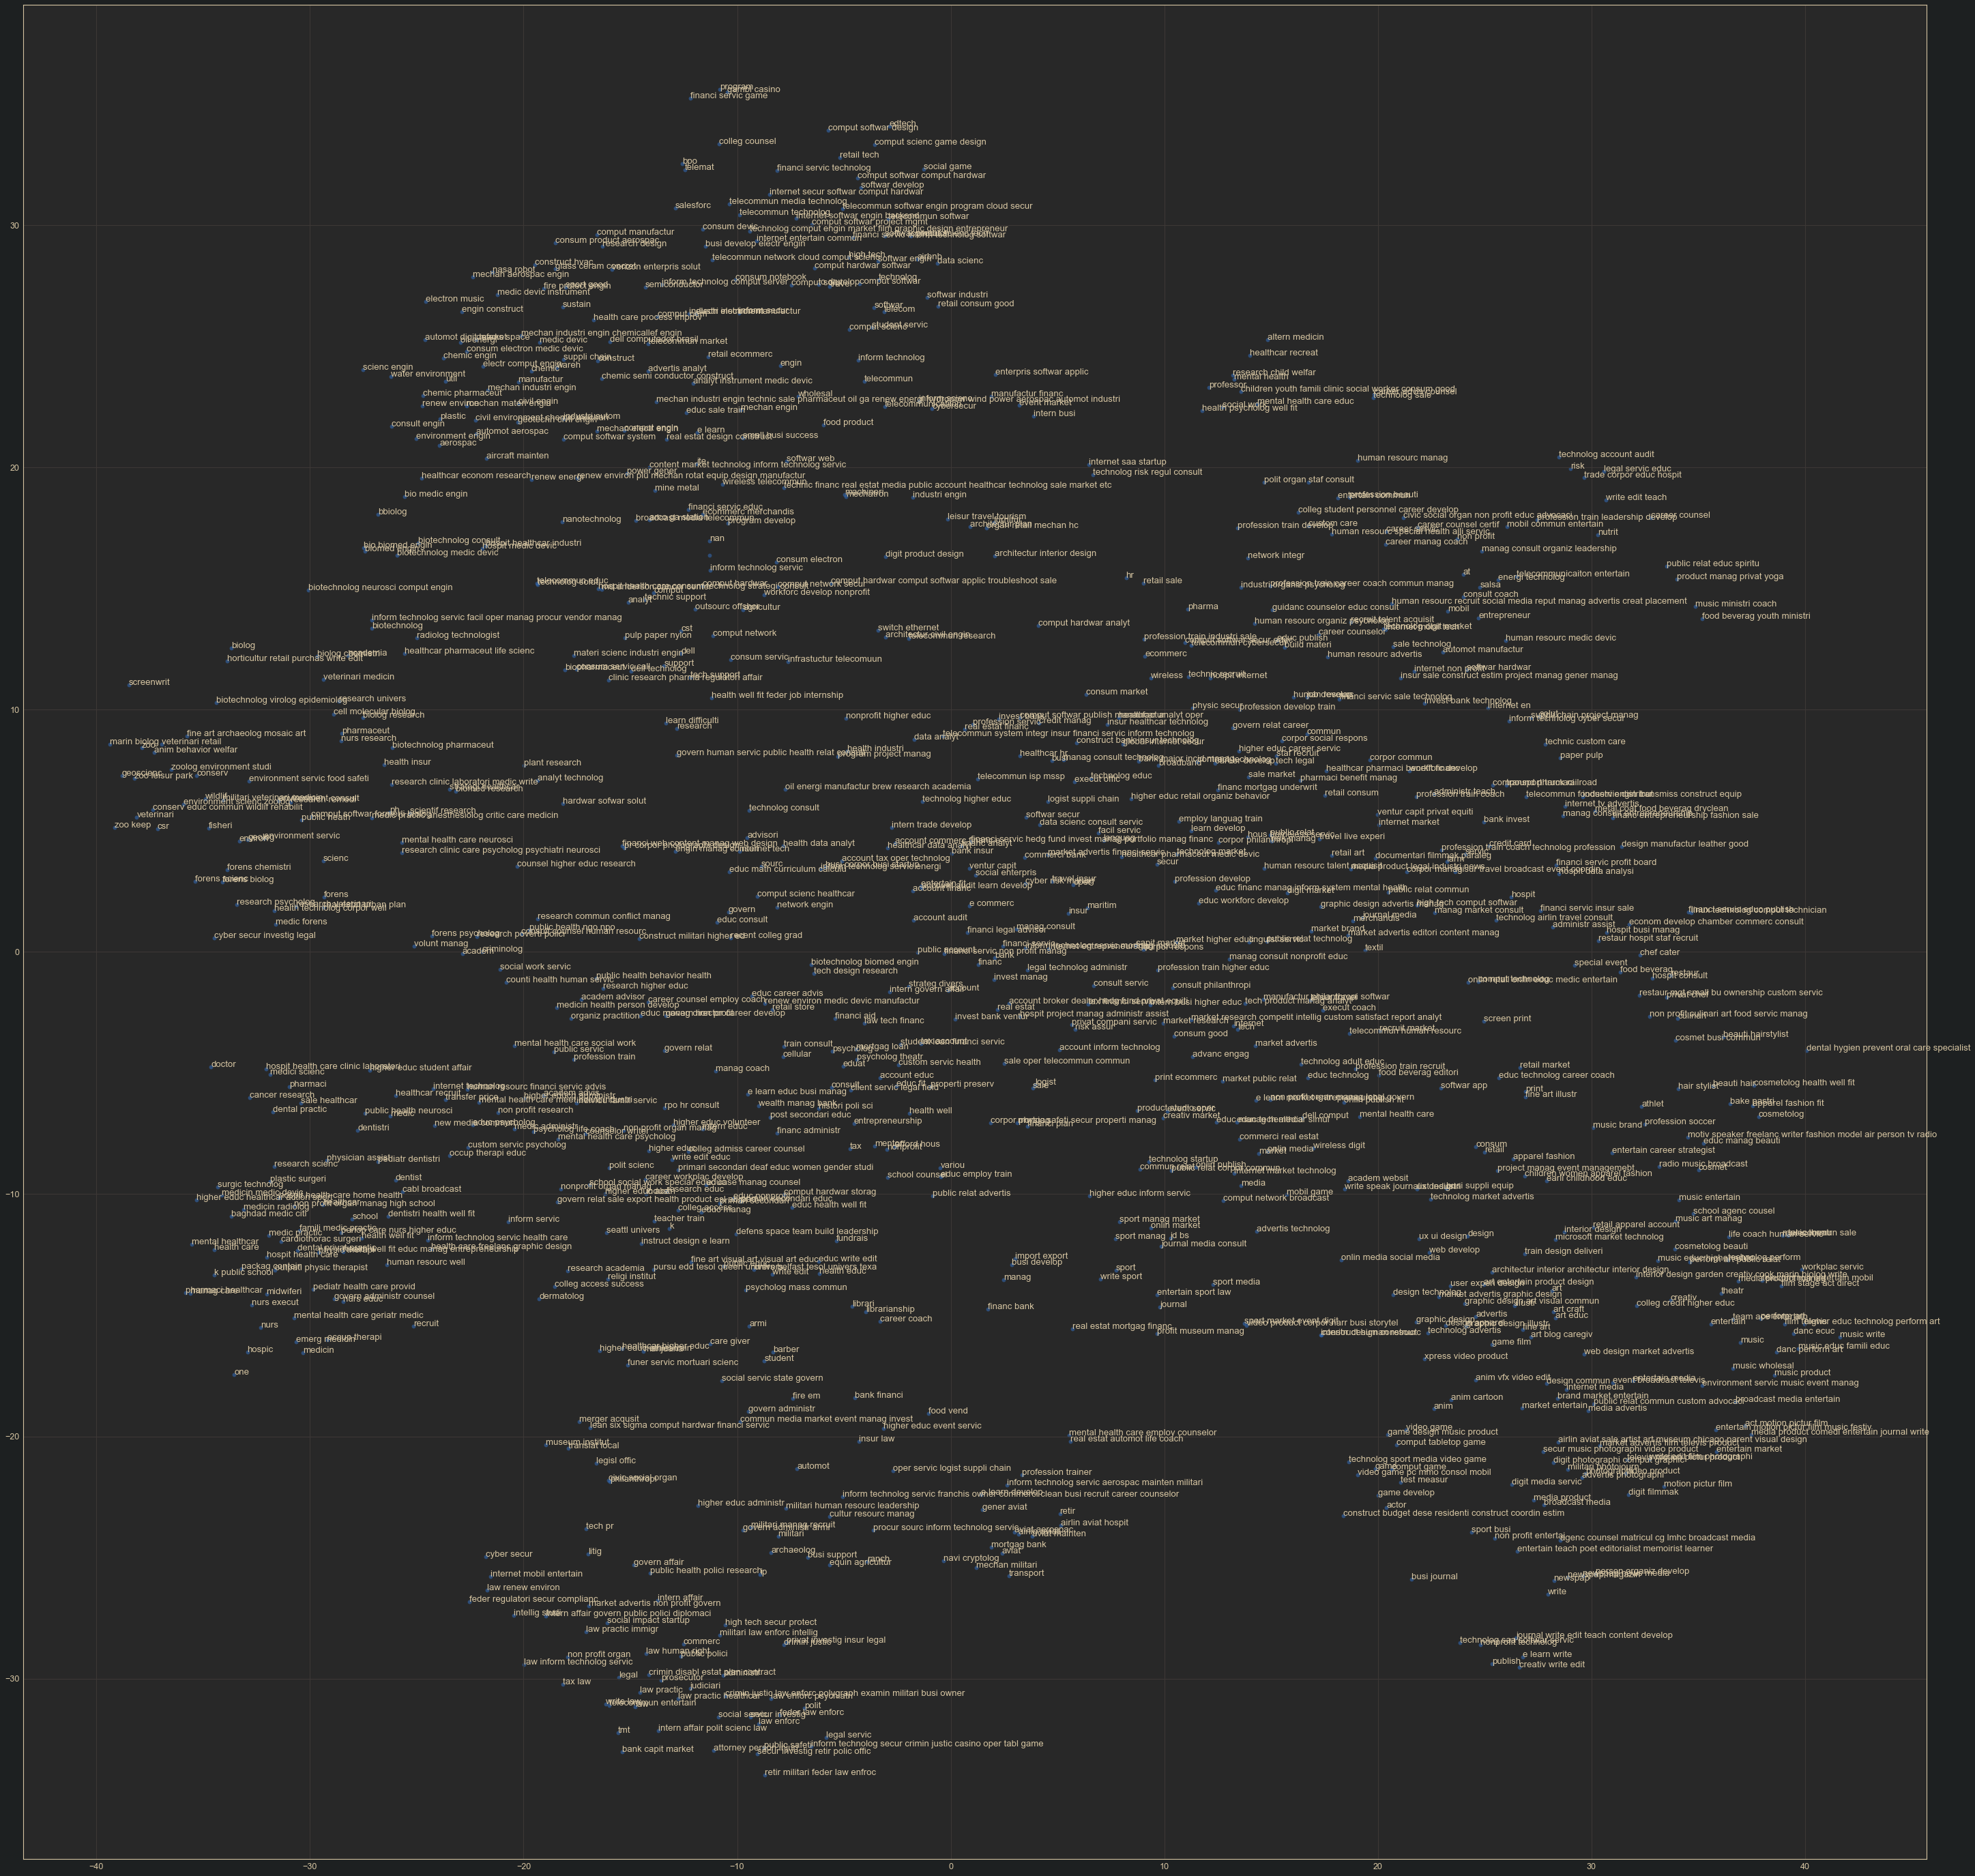

In [15]:
fig, ax = plt.subplots(figsize = (50, 50))

plt.scatter(proj[:, 0], proj[:, 1], alpha = 0.5)

for i, name in tqdm(enumerate(d2v.docvecs.index2entity)):
    ax.annotate(name, (proj[i, 0], proj[i, 1]))

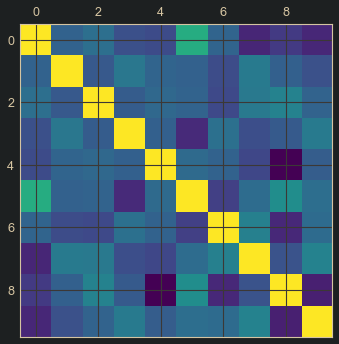

In [16]:
plt.matshow(pd.DataFrame(d2v.docvecs.vectors_docs).corr())

In [17]:
pd.DataFrame(d2v.docvecs.vectors_docs).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.052278,0.125469,-0.041193,-0.062649,0.476154,0.065474,-0.229820,-0.143682,-0.226636
1,0.052278,1.000000,0.004423,0.168991,0.066971,0.049471,-0.059249,0.183925,0.045055,-0.035716
2,0.125469,0.004423,1.000000,0.019606,0.089053,0.061531,-0.076463,0.177239,0.233011,0.057419
3,-0.041193,0.168991,0.019606,1.000000,0.042824,-0.212817,0.131160,-0.047314,0.012702,0.186628
4,-0.062649,0.066971,0.089053,0.042824,1.000000,0.097576,0.053768,-0.084394,-0.379372,0.024806
5,0.476154,0.049471,0.061531,-0.212817,0.097576,1.000000,-0.116836,0.105573,0.296984,0.119895
6,0.065474,-0.059249,-0.076463,0.131160,0.053768,-0.116836,1.000000,0.220508,-0.220200,0.104032
7,-0.229820,0.183925,0.177239,-0.047314,-0.084394,0.105573,0.220508,1.000000,-0.024784,0.230304
8,-0.143682,0.045055,0.233011,0.012702,-0.379372,0.296984,-0.220200,-0.024784,1.000000,-0.257947
9,-0.226636,-0.035716,0.057419,0.186628,0.024806,0.119895,0.104032,0.230304,-0.257947,1.000000


# Save

In [19]:
d2v.save('industries.d2v')

In [20]:
docvecs = {d2v.docvecs.index2entity[i]: d2v.docvecs.vectors_docs[i] for i in range(len(d2v.docvecs.index2entity))}

In [21]:
with open('industries_embs.pickle', 'wb') as file:
    pickle.dump(docvecs, file)